In [35]:
%pylab inline
import crystal
import pandas as pd
from scipy.optimize import minimize
import re
import cvxpy as cvx


scatter = lambda x,y,**kw: plt.scatter(x, y, edgecolors='k', facecolors='none', **kw)
standardize = lambda x: (x - np.mean(x))/np.std(x)

Populating the interactive namespace from numpy and matplotlib


/n/home04/kmdalton/opt/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'scatter']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


ModuleNotFoundError: No module named 'cvxpy'

In [5]:
reflectionFN = 'test/reflections.csv.bz2' #DHFR THz Data
I = pd.read_csv(reflectionFN).sample(frac=0.01)

      fun: 28138.530031758062
 hess_inv: array([[1.66817797e-07]])
      jac: array([0.10424805])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 270
      nit: 1
     njev: 86
   status: 2
  success: False
        x: array([-4.11342713e-09])


(-1.1303180663011876, 4.227079431678381)

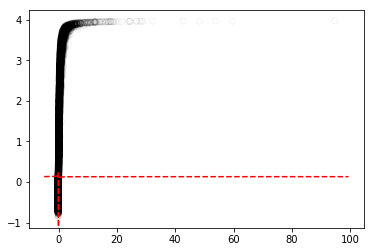

In [34]:
x = I['IOBS']
y = x/I['SIGMA(IOBS)']

x,y = standardize(x), standardize(y)

scatter(x, y, alpha = 0.05)

po = [y.max(), x.mean(), 0.]

for i in range(10):
    A,B,C = po
    f = minimize(lambda p: np.sum(np.abs(
        y*p[1] + y*x - p[0]*x - C*p[1] + C*x
    )), [A, B])
    A,B = f.x
    f = minimize(lambda p: np.sum(np.abs(
        y*B + y*x - A*x - C*B + p[0]*x
    )), [C])
    C = f.x

print(f)
p = f.x

x = np.linspace(plt.xlim()[0], plt.xlim()[1], 1000)
y = x*A/(B + x) + C
ymin,ymax = plt.ylim()
plt.plot(x, y, '--r')
plt.ylim(ymin, ymax)